<a href="https://colab.research.google.com/github/Mashiat12/Synthetic_Brain_Image_Generation/blob/main/Enhancement_portion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torchvision.transforms as T
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image, ImageEnhance
import cv2

In [ ]:
def get_default_device():
    return torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

device = get_default_device()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import json
import os
kaggle_credentails= json.load(open("/content/drive/MyDrive/kaggle.json"))
os.environ['KAGGLE_USERNAME'] = kaggle_credentails['username']
os.environ['KAGGLE_KEY'] = kaggle_credentails['key']
!kaggle datasets download -d ashfakyeafi/brain-mri-images

Dataset URL: https://www.kaggle.com/datasets/ashfakyeafi/brain-mri-images
License(s): apache-2.0
 99% 343M/348M [00:05<00:00, 96.9MB/s]
100% 348M/348M [00:05<00:00, 62.5MB/s]


In [ ]:
from zipfile import ZipFile
with ZipFile("/content/brain-mri-images.zip",'r') as zip_ref:
  zip_ref.extractall()


In [ ]:
print(os.listdir("/content/GAN-Traning Images"))
print(len(os.listdir("/content/GAN-Traning Images")))

['Tr-gl_0714.jpg', 'OAS2_0048_MR2_y_slice_105.jpg', 'Tr-no_1499.jpg', 'Tr-pi_0997.jpg', 'OAS2_0169_MR1_x_slice_112.jpg', 'OAS2_0034_MR2_y_slice_148.jpg', 'Te-gl_0085.jpg', 'Te-me_0108.jpg', 'OAS2_0127_MR4_x_slice_145.jpg', 'Tr-no_1363.jpg', 'Tr-gl_0467.jpg', 'OAS2_0018_MR1_y_slice_110.jpg', 'OAS2_0095_MR1_z_slice_138.jpg', 'OAS2_0108_MR1_y_slice_109.jpg', 'Tr-no_0613.jpg', 'Tr-pi_1187.jpg', 'Tr-pi_0578.jpg', 'OAS2_0028_MR1_x_slice_110.jpg', 'OAS2_0021_MR1_x_slice_136.jpg', 'OAS2_0064_MR3_x_slice_148.jpg', 'OAS2_0002_MR2_z_slice_128.jpg', 'Tr-gl_0977.jpg', 'OAS2_0047_MR1_x_slice_145.jpg', 'OAS2_0034_MR1_z_slice_103.jpg', 'Tr-no_1379.jpg', 'OAS2_0030_MR1_y_slice_119.jpg', 'OAS2_0053_MR2_x_slice_130.jpg', 'Tr-gl_0987.jpg', 'Tr-pi_0664.jpg', 'OAS2_0100_MR1_z_slice_122.jpg', 'OAS2_0100_MR3_x_slice_105.jpg', 'Te-no_0202.jpg', 'OAS2_0144_MR2_x_slice_138.jpg', 'OAS2_0171_MR3_y_slice_113.jpg', 'Tr-pi_1219.jpg', 'Te-me_0048.jpg', 'OAS2_0073_MR4_z_slice_126.jpg', 'OAS2_0114_MR1_x_slice_128.jpg', 

(554, 554, 3)


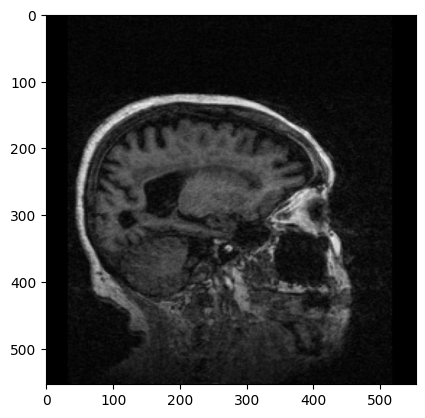

In [ ]:
import matplotlib.image as mpimg #This will import the required module
import matplotlib.pyplot as plt
imagepath='/content/GAN-Traning Images/OAS2_0023_MR2_z_slice_137.jpg'
img=mpimg.imread(imagepath)
print(img.shape)
plt.imshow(img)

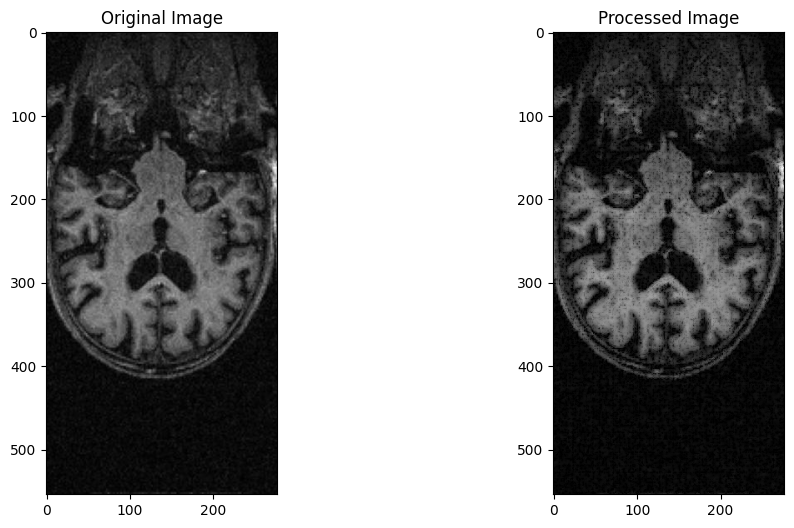

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def preprocess_image(img_path):
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        print(f"Error: Could not load image at {img_path}. Please check the file path and ensure the image is not corrupted.")
        return None

    # Step 1: Apply Laplacian Filter
    laplacian = cv2.Laplacian(img, cv2.CV_64F)
    b = cv2.convertScaleAbs(laplacian)  # Convert back to uint8

    # Step 2: Sharpen by Subtracting Laplacian from Original Image
    c = cv2.subtract(img, b)

    # Step 3: Apply Sobel Filter
    sobel_x = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
    sobel_y = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)
    d = cv2.magnitude(sobel_x, sobel_y)
    d = cv2.convertScaleAbs(d)  # Convert back to uint8

    # Step 4: Smooth with 5x5 Averaging Filter
    #e = cv2.blur(d, (5, 5))

    # Step 5: Compute Mask (f)
    #f = cv2.multiply(c, e)

    # Step 6: Sharpen Image by Adding Mask
    #g = cv2.add(img, f)

    # Step 7: Apply Power-Law Transformation (Gamma Correction)
    #gamma = 2
   # g = np.power(g / 255.0, gamma) * 255.0
   # g = cv2.convertScaleAbs(g)  # Convert back to uint8

    return c

# Path to the image
img_path = '/content/GAN-Traning Images/OAS2_0001_MR2_x_slice_107.jpg'

# Process the image
final_img = preprocess_image(img_path)

# Display Original and Final Processed Images
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Load and show original image
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
if img is not None:
    ax[0].imshow(img, cmap='gray')
    ax[0].set_title('Original Image')
    ax[0].axis('on')
else:
    ax[0].text(0.5, 0.5, 'Error loading image', ha='center', va='center')
    ax[0].axis('off')

# Show final processed image
if final_img is not None:
    ax[1].imshow(final_img, cmap='gray')
    ax[1].set_title('Processed Image')
    ax[1].axis('on')
else:
    ax[1].text(0.5, 0.5, 'Error processing image', ha='center', va='center')
    ax[1].axis('off')

plt.show()

(554, 554, 3)


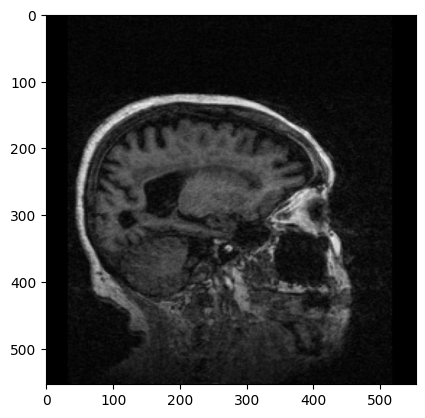

In [ ]:
img_path = '/content/GAN-Traning Images/OAS2_0023_MR2_z_slice_137.jpg'
img = cv2.imread(img_path)
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
print(img.shape)
plt.imshow(img)

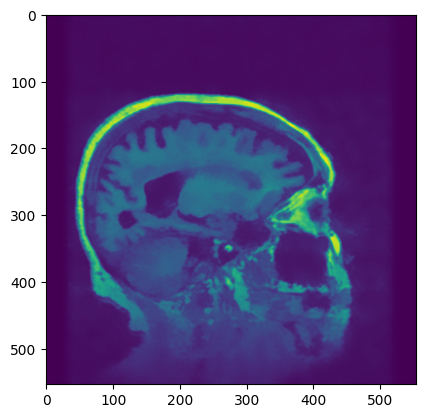

In [ ]:
 denoised_img = cv2.fastNlMeansDenoising(gray_img, None, 20, 3, 21)
 plt.imshow(denoised_img)

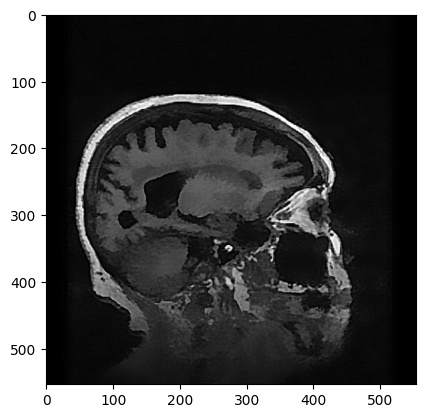

In [ ]:
kernel_sharpen = np.array([[-1, -1, -1],
                           [-1, 9, -1],
                           [-1, -1, -1]])
sharpened_img = cv2.filter2D(denoised_img, -1, kernel_sharpen)
plt.imshow(sharpened_img,cmap='gray' )

In [ ]:

# Image Processing: Denoising, Smoothing, and Histogram Equalization
def preprocess_image(img_path):
    # Read image using OpenCV
    img = cv2.imread(img_path)
    # Check if image was loaded correctly
    if img is None:
        print(f"Error: Could not load image at {img_path}. Please check the file path and ensure the image is not corrupted.")
        return None

    # Convert to grayscale for processing (for MRI data, grayscale may be appropriate)
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Denoising the image
    denoised_img = cv2.fastNlMeansDenoising(gray_img, None, 20, 3, 21)

    # Smoothing the image using Gaussian blur
   # smoothed_img = cv2.GaussianBlur(denoised_img, (3, 3), 0)
   # Sharpening using a custom kernel to enhance edges without overdoing it
    kernel_sharpen = np.array([[-1, -1, -1],
                           [-1, 9, -1],
                           [-1, -1, -1]])
    sharpened_img = cv2.filter2D(denoised_img, -1, kernel_sharpen)
    #equalized_img = cv2.equalizeHist(sharpened_img)

    return sharpened_img


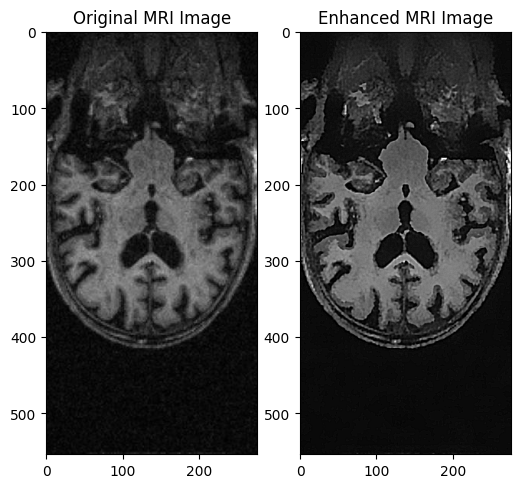

In [ ]:

# Original Image
fig, ax = plt.subplots(1, 2, figsize=(6, 6))
img_path = '/content/GAN-Traning Images/OAS2_0001_MR2_x_slice_107.jpg'
img=mpimg.imread(img_path)
ax[0].imshow(img , cmap='gray')
ax[0].set_title('Original MRI Image')
ax[0].axis('on')
preprocessed_img = preprocess_image(img_path)
# Enhanced Image
ax[1].imshow(preprocessed_img, cmap='gray')
ax[1].set_title('Enhanced MRI Image')
ax[1].axis('on')

plt.show()
# Convert the preprocessed image to tensor (to feed into the GAN model)
preprocessed_img = Image.fromarray(preprocessed_img)
transform = T.Compose([
    T.Resize((64, 64)),
    T.ToTensor(),
    T.Normalize((0.5,), (0.5,))
])


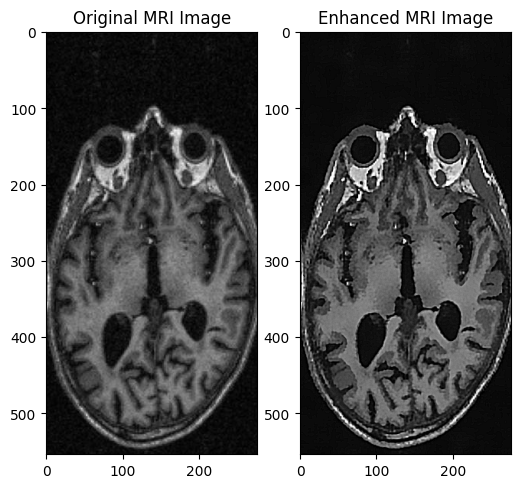

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(6, 6))
img_path = '/content/GAN-Traning Images/OAS2_0001_MR2_y_slice_105.jpg'
img1=mpimg.imread(img_path)
ax[0].imshow(img1 , cmap='gray')
ax[0].set_title('Original MRI Image')
ax[0].axis('on')
preprocessed_img = preprocess_image(img_path)
# Enhanced Image
ax[1].imshow(preprocessed_img, cmap='gray')
ax[1].set_title('Enhanced MRI Image')
ax[1].axis('on')

plt.show()
# Convert the preprocessed image to tensor (to feed into the GAN model)
preprocessed_img = Image.fromarray(preprocessed_img)
transform = T.Compose([
    T.Resize((64, 64)),
    T.ToTensor(),
    T.Normalize((0.5,), (0.5,))
])

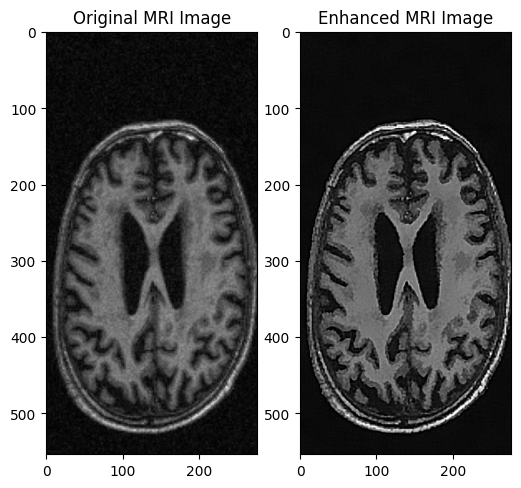

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(6, 6))
img_path = '/content/GAN-Traning Images/OAS2_0001_MR2_y_slice_137.jpg'
img1=mpimg.imread(img_path)
ax[0].imshow(img1 , cmap='gray')
ax[0].set_title('Original MRI Image')
ax[0].axis('on')
preprocessed_img = preprocess_image(img_path)
# Enhanced Image
ax[1].imshow(preprocessed_img, cmap='gray')
ax[1].set_title('Enhanced MRI Image')
ax[1].axis('on')

plt.show()
# Convert the preprocessed image to tensor (to feed into the GAN model)
preprocessed_img = Image.fromarray(preprocessed_img)
transform = T.Compose([
    T.Resize((64, 64)),
    T.ToTensor(),
    T.Normalize((0.5,), (0.5,))
])

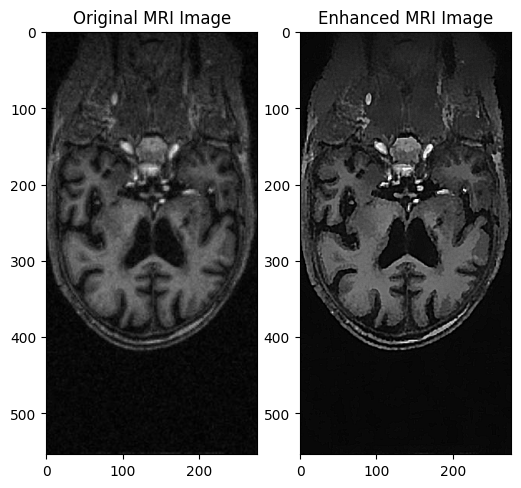

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(6, 6))
img_path = '/content/GAN-Traning Images/OAS2_0001_MR2_x_slice_128.jpg'
img1=mpimg.imread(img_path)
ax[0].imshow(img1 , cmap='gray')
ax[0].set_title('Original MRI Image')
ax[0].axis('on')
preprocessed_img = preprocess_image(img_path)
# Enhanced Image
ax[1].imshow(preprocessed_img, cmap='gray')
ax[1].set_title('Enhanced MRI Image')
ax[1].axis('on')

plt.show()
# Convert the preprocessed image to tensor (to feed into the GAN model)
preprocessed_img = Image.fromarray(preprocessed_img)
transform = T.Compose([
    T.Resize((64, 64)),
    T.ToTensor(),
    T.Normalize((0.5,), (0.5,))
])